<h1>Gradiente Descendente</h1>

<div align="justify">Provavelmente um dos mais populares métodos de otimização de parâmetros em aprendizado de máquina, 
o <b>Gradiente Descendente</b> nos permite encontrar, de forma iterativa, pontos que levam a valores mínimos de funções. Modelamos funções que representam erros de classificação ou predição, e por meio da aplicação deste método, descobrimos parâmetros que possibilitam minimizá-los. Muitas vezes, por meio da otimização de parâmetros dessas funções que modelam erros e custos é que se torna possível realizar o aprendizado de máquina. É pela transformação de nossos problemas de <b>Machine Learning</b> em problemas de otimização de parâmetros que podemos aplicar métodos como o Gradiente Descendente e resolvê-los sem maiores complicações.</div>
<br>

<div align="justify">O método do Gradiente Descendente é muito utilizado para o aprendizado em <b>Redes Neurais Artificiais</b>, modelo que fornece as bases para o aprendizado das técnicas de <b>Deep Learning</b>, tão populares atualmente. Um dos motivos da grande utilização da aprendizagem profunda, como também é conhecida, é o seu bom desempenho em problemas como processamento de imagens, processamento de linguagem natural, mineração de dados e de texto, criação automática de filmes, imagens e de música, entre outras tantas aplicações.</div>
<br>

<div align="justify">Como veremos, a implementação em uma linguagem de programação do Gradiente Descendente é muito simples. Além disso, também é trivial compreender as principais idéias que permitem a sua aplicação. Entretanto, para que você compreenda bem as bases matemáticas que levam ao método é importante conhecer as técnicas de derivação de funções de mais de uma variável. Não se preocupe, mesmo que você não domine a parte matemática será possível compreender os conceitos principais, e isto será suficiente para aplicar o modelo a problemas diversos.</div>
<br>

<div align="justify">Neste artigo, explicaremos o funcionamento do algoritmo do Gradiente Descendente, sua fundamentação matemática, a implementação em código (Python) do método e algumas aplicações. É importante que você possua familiaridade com o desenvolvimento de software em Python para melhor compreensão das implementações.</div>

<h3>Então, o que é o tal gradiente?</h3>

<div align="justify">Considere uma função $\:f(x,y):\mathbb{R}^2\longrightarrow\mathbb{R}$. Sabemos que a derivada direcional desta função na direção do vetor unitário $\overrightarrow{\bf u}(u_1,u_2)$ é dada pela equação abaixo. A derivada direcional nos mostra a taxa de crescimento ou decrescimento de uma função em uma dada direção, neste caso, a direção é a do vetor unitário $\overrightarrow{\bf u}$. Após restringirmos o comportamento da função a uma única direção, a interpretação da derivada direcional é semelhante ao caso de uma função de uma única variável, em que temos somente duas dimensões. Vamos à definição:</div>
<br>
<div align="center">
$\dfrac{df(x,y)}{d\overrightarrow{\bf u}} = \dfrac{\partial f(x,y)}{\partial x} u_1 + \dfrac{\partial f(x,y)}{\partial y} u_2 $
</div>
<br>
<div align="justify">
Pela definição do gradiente, escrevemos também:
</div>
<br>
<div align="center">
    $\nabla f = \left(\dfrac{\partial f(x,y)}{\partial x},\dfrac{\partial f(x,y)}{\partial y}\right)$
</div>
<br>
<div align="justify">
Consequentemente, podemos reescrever a derivada direcional como produto interno do gradiente pelo vetor direção:
</div>
<br>
<div align="center">
    $\dfrac{df(x,y)}{d\overrightarrow{\bf u}} = \nabla f \bullet \overrightarrow{\bf u} = ||\nabla f||\: || \overrightarrow{\bf u} || \cos{\theta}$
</div>
<br>

<div align="justify">
Como o vetor u é unitário, temos $||\overrightarrow{\bf u}||=1$ e desta forma: $\dfrac{df(x,y)}{d\overrightarrow{\bf u}} = ||\nabla f|| \cos{\theta}$. Analisando está fórmula, percebemos que o valor máximo da derivada direcional é $||\nabla f||$, pois a função $\cos{\theta}$ atinge seu valor máximo em $1$. Além disso, atinge seu mínimo em $-1$ e portanto a derivada direcional atinge seu mínimo em $-||\nabla f||$. 
</div>
<br>
<div align="justify">
Deste modo, observamos que se assumirmos que $\cos \theta = 1$, o único posicionamento possível é que o vetor gradiente possui a mesma direção e sentido do vetor unitário. Se escolhermos o vetor $\overrightarrow{\bf u}$ assim, então, podemos concluir que é na direção e sentido do vetor gradiente que a derivada direcional possui valor máximo, ou seja, na direção e sentido do vetor gradiente é que a função cresce mais rapidamente.<div>
<br>
<div align="justify" style="clear:both;">
Estas informações sobre o crescimento ou decrescimento da função são fundamentais para compreendermos o algoritmo do <b>Gradiente Descendente</b> e, analogamente, o mesmo raciocínio poderia ser aplicado para compreender o <b>Gradiente Ascendente</b>. As idéias apresentadas acima, se aplicam também para funções com mais variáveis, a formulação para a derivada direcional e o gradiente mudam, mas o raciocínio é análogo e pode ser estendido para mais variáveis sem grandes dificuldades. Saberíamos então, por meio do cálculo das coordenadas do vetor gradiente, qual seria a direção, em uma superfície definida por uma função de várias variáveis, para onde a função cresce mais rapidamente.
</div>
<br>
<div align="center">
$\dfrac{df(x_1,x_2, \ldots, x_n)}{d\overrightarrow{\bf u}} = \dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_1} u_1 + \dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_2} u_2 + \ldots + \dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_n} u_n  = \sum_{i=1}^{n} \dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_i} u_i$
</div>
<br>
<div align="center">
$\nabla f = \left(\dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_1},\dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_2}, \ldots, \dfrac{\partial f(x_1,x_2, ..., x_n)}{\partial x_n}\right)$
</div>




<h3>Como funciona o algoritmo?</h3>

Suponha que temos uma função de diversas variáveis, e estamos tentando descobrir o seu mínimo. Essa função, pode definir uma superfície multidimensional, mas para simplificar imagine que seja o gráfico definido por uma função de duas variáveis somente, como a superfície que apresentamos abaixo:

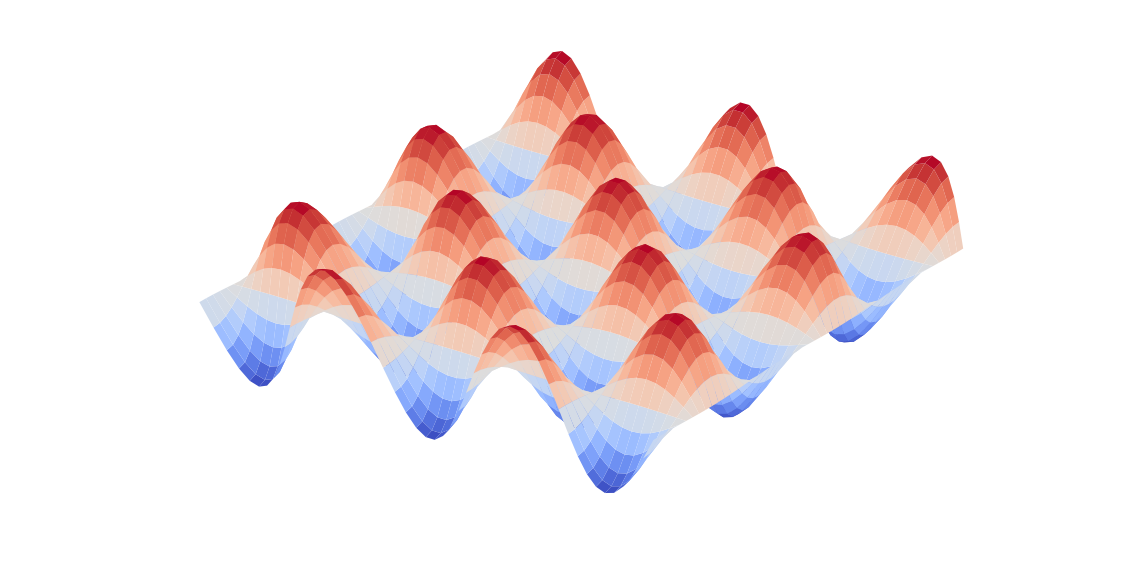

In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (np.sin(5*x)*np.cos(5*y))/5

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

x = np.linspace(-60, 60, 50)
y = np.linspace(-60, 60, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.grid(False)
plt.axis('off')
ax.view_init(60, 35)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')
ax.set_title('');



<div align="justify">
A função apresentada é $\:f(x,y) = \dfrac{sin(5x)*cos(5y)}{5}$ que, como podemos ver, possui diversos picos. Se escolhermos um ponto qualquer sobre alguma região destes picos (região mais avermelhada), e calcularmos o gradiente da função neste ponto, obteremos um vetor que aponta na direção em que esta função mais cresce. O vetor oposto ($- \nabla f$) apontará na direção em que a função mais descresce. Podemos ajustar nossos parâmetros de acordo com esta direção, para alcançarmos mínimos ou máximos da função aos poucos. É disto que trata o algoritmo do gradiente descendente.
</div>
<br>
<div align="justify">
No caso do <b>Gradiente Descendente</b>, estamos procurando chegar aos mínimos desta função. Ou seja, escolheremos um ponto e calcularemos o gradiente para sabermos para qual direção deveremos ir para alcançar os mínimos mais depressa. E note que é essa informação que o vetor oposto ao gradiente nos fornece. Após conhecermos a direção, ajustaremos os parâmetros de nossa função para avançarmos um pouco na direção oposta a do gradiente e chegarmos ao próximo ponto. Neste novo ponto, realizaremos o mesmo procedimento, e assim sucessivamente, até alcançarmos o mínimo.
</div>
<br>
<div align="justify">
Podemos realizar uma analogia com descer uma montanha. Ao escolher a direção em que aponta o gradiente, estamos escolhendo a direção na qual essa descida é a mais rápida possível.
</div>



Se $\bf \overrightarrow{x}$ for nosso vetor de parâmetros, ajustaremos estes parâmetros da seguinte forma:

$\bf{\overrightarrow{x}} \leftarrow \bf{\overrightarrow{x}} - \alpha \overrightarrow{\nabla f}(x_1,x_2,\dots, x_n)$

Ou seja, nosso novo vetor de parâmetros será:

$\left[
\begin{array}{c}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{array}
\right] - \alpha
\left[
\begin{array}{c}
\frac{\partial f(x_1,x_2, \ldots, x_n)}{\partial x_1} \\
\frac{\partial f(x_1,x_2, \ldots, x_n)}{\partial x_2} \\
\vdots \\
\frac{\partial f(x_1,x_2, \ldots, x_n)}{\partial x_n} \\
\end{array} 
\right] =
\left[
\begin{array}{c}
x_1 - \alpha \frac{ \partial f(x_1,x_2, \ldots, x_n)}{\partial x_1} \\
x_2 - \alpha \frac{ \partial f(x_1,x_2, \ldots, x_n)}{\partial x_2} \\
\vdots \\
x_n - \alpha \frac{ \partial f(x_1,x_2, \ldots, x_n)}{\partial x_n} \\
\end{array} 
\right]
$

<div align="justify">
Aplicaremos este ajuste iterativamente até atingirmos nosso critério de parada.

Na fórmula acima, a constante $\alpha$ é um dos parâmetros do modelo, conhecido como <b>taxa de aprendizagem</b>. Este valor determina o quanto o gradiente contribuirá para o ajuste do vetor $\bf \overrightarrow{x}$. A taxa de aprendizagem permite regular a velocidade com que a função se aproxima do valor mínimo. Mas note que uma taxa de aprendizagem alta pode fazer com que passemos direto do ponto mínimo para uma outra região da função e tenhamos que retornar, fazendo com que os valores dos parâmetros oscilem durante algum tempo no entorno do mínimo. Já uma taxa de aprendizagem muito baixa pode fazer com que demoremos várias iterações a mais para alcançar o mínimo.

Na próxima seção, implementamos o algoritmo do gradiente descendente, e geramos gráficos com o comportamento obtido para diferentes ajustes de $\alpha$. Observe os gráficos, e veja como fica mais clara, a importância de escolher esse parâmetro adequadamente.
</div>

<h3>Implementação do Algoritmo em Python (função de uma variável)</h3>

Inicialmente, vejamos a implementação do algoritmo do <b>Gradiente Descendente</b> para uma função de uma única variável:

0


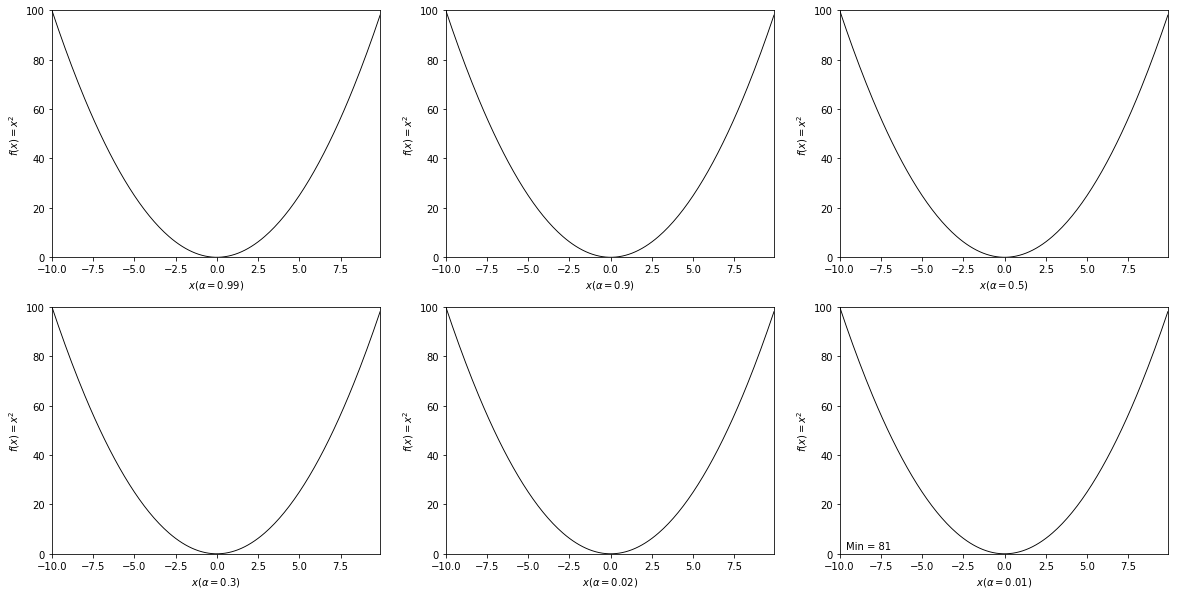

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# função cujos parâmetros serão otimizados
def func(x):
    y = x**2
    return y

# derivada da função escolhida
def derivative(x):
    y = 2*x
    return y

# algoritmo do gradiente descendente
def gradient_descent(start_point, learning_rate, epochs):
    plot_x = []
    plot_y = []
    
    plot_x.append(start_point)
    plot_y.append(func(start_point))
    
    x = start_point
    for epoch in range(epochs):
        ## atualizacao de parâmetros
        x = x - learning_rate*(derivative(x))
        ###
        plot_x.append(x)
        plot_y.append(func(x))

    return plot_x, plot_y 

def animate(i, line, value_display, plot_x, plot_y):
    print i
    line.set_data(plot_x[:i], plot_y[:i])
    value_display = value_display.set_text('Min = ' + str(plot_y[i]))
       
    

fig, axs = plt.subplots(2,3, figsize=(20,10))

# ponto inicial
start_point = 9
# taxa de aprendizado
learning_rate = [0.99, 0.9,0.5,0.3, 0.02, 0.01]
# quantidade de iterações do algoritmo (épocas)
epochs = 50

k=0
axs =  axs.flatten()
for ax in axs:    
    
    # Criar elementos para animação
    line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
    value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)
    
    # Desenhar gráfico da função
    x = np.arange(-10, 10, 0.1)
    y = func(x)
    ax.plot(x, y, lw = 0.9, color = 'k')
    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([min(y), max(y)])
    ax.set_xlabel(r'$x (\alpha='+str(learning_rate[k])+r')$')
    ax.set_ylabel(r'$f(x)=x^2$')
    ##

    # Destacar pontos e desenhar as setas
    plot_x, plot_y = gradient_descent(start_point, learning_rate[k], epochs)
    #ax.scatter(plot_x, plot_y, c = 'b')
    k+=1
    #for i in range(1, epochs+1):
    #    ax.annotate('', xy=(plot_x[i], plot_y[i]), xytext=(plot_x[i-1], plot_y[i-1]),
    #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
    #                   va='center', ha='center')
    ##
    anim = animation.FuncAnimation(fig, animate, fargs=(line, value_display, plot_x, plot_y),
                               frames=len(plot_x), interval=120, 
                               repeat_delay=60)
plt.show()
    



<div align="justify">
No exemplo acima, utilizamos a função $\:f(x):\mathbb{R}\longrightarrow\mathbb{R}\:f(x)=x^2$, cuja derivada é a função $f(x)=2x$. Para cada gráfico, utilizamos um valor diferente da taxa de aprendizagem, exibido na parte inferior do gráfico. 
</div>

<div align="justify">
Observe que para valores mais altos da taxa de aprendizagem, que neste caso correspondem a 0.99 e 0.9, o ponto oscila muito ao redor do valor mínimo. E veja que para valores como 0.5 e 0.3, o mínimo é atingido em poucas iterações. Além disso, para valores pequenos, como 0.01 e 0.02 a convergência é bastante lenta. Aproveite esta implementação para testar outros valores de taxa de aprendizado, ponto inicial e quantidade de iterações. Você também pode experimentar algumas outras funções (não esqueça de derivar a função e substituir a derivada no local adequado).
</div>


<div align="justify">
Outro ponto a destacar é a escolha do ponto inicial, o ponto de partida de nossa otimização. Dependendo da escolha feita, podemos ficar presos a um mínimo local da função.
</div>